## Download dataset

In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("orvile/airline-market-fare-prediction-data")

print("Path to dataset files:", path)

/home/maria/anaconda3/envs/tct/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/maria/.cache/kagglehub/datasets/orvile/airline-market-fare-prediction-data/versions/1


## Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint as pp
import seaborn as sns

## Read data

In [4]:
path_file = path + '/Airline_Market_Fare_Prediction_Data/MarketFarePredictionData.csv'
df = pd.read_csv(path_file)
df.head()

,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
0,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.367460,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
1,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.051724,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132
2,2,178,152,170,260,6,1784.0,0.0,4035,136.0,...,1.034753,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.009366,0.116826,0.000132
3,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.029884,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
4,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.062291,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132


In [4]:
print('Variables names:', list(df.columns))

Variables names: ['MktCoupons', 'OriginCityMarketID', 'DestCityMarketID', 'OriginAirportID', 'DestAirportID', 'Carrier', 'NonStopMiles', 'RoundTrip', 'ODPairID', 'Pax', 'CarrierPax', 'Average_Fare', 'Market_share', 'Market_HHI', 'LCC_Comp', 'Multi_Airport', 'Circuity', 'Slot', 'Non_Stop', 'MktMilesFlown', 'OriginCityMarketID_freq', 'DestCityMarketID_freq', 'OriginAirportID_freq', 'DestAirportID_freq', 'Carrier_freq', 'ODPairID_freq']


# Exploring dataset

In [5]:
id_like_cols = [
    'OriginCityMarketID', 'DestCityMarketID',
    'OriginAirportID', 'DestAirportID',
    'ODPairID', 'OriginCityMarketID_freq',
    'DestCityMarketID_freq', 'OriginAirportID_freq',
    'DestAirportID_freq', 'Carrier_freq', 'ODPairID_freq'
]

numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in id_like_cols]

pseudo_categorical_cols = [col for col in numeric_cols if df[col].nunique() <= 10]

true_numeric_cols = [col for col in numeric_cols if col not in pseudo_categorical_cols]

print(f"Number of rows: {df.shape[0]}, number of columns: {df.shape[1]}")

print("\nTrue numeric columns (excluding IDs and categories):")
print(true_numeric_cols)

print("\nDescriptive statistics for true numeric variables:")
display(df[true_numeric_cols].describe())

print("\nPseudo-categorical variables (numeric type, few unique values):")
for col in pseudo_categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values -> {sorted(df[col].unique())}")

print("\nMissing values (percentage):")
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))



Number of rows: 1581278, number of columns: 26

True numeric columns (excluding IDs and categories):
['Carrier', 'NonStopMiles', 'Pax', 'CarrierPax', 'Average_Fare', 'Market_share', 'Market_HHI', 'Circuity', 'MktMilesFlown']

Descriptive statistics for true numeric variables:


,Carrier,NonStopMiles,Pax,CarrierPax,Average_Fare,Market_share,Market_HHI,Circuity,MktMilesFlown
count,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06
mean,1.277755e+01,1.183158e+03,1.773202e+05,6.299279e+04,2.144831e+02,4.872004e-01,5.012627e+03,1.026428e+00,1.213717e+03
std,7.785476e+00,7.136535e+02,2.380289e+05,8.802554e+04,7.337322e+01,2.977998e-01,2.494343e+03,1.091917e-01,7.268271e+02
min,0.000000e+00,1.000000e+02,1.000000e+00,1.000000e+00,6.739000e+01,5.001139e-02,1.553420e+03,1.000000e+00,1.020000e+02
25%,4.000000e+00,6.430000e+02,3.182400e+04,1.305200e+04,1.669400e+02,2.367379e-01,3.057060e+03,1.000000e+00,6.580258e+02
50%,1.500000e+01,1.011000e+03,8.654300e+04,3.106800e+04,2.022700e+02,4.273371e-01,4.269820e+03,1.000000e+00,1.040641e+03
75%,2.000000e+01,1.590000e+03,2.318210e+05,7.597000e+04,2.466400e+02,7.170709e-01,6.339910e+03,1.000000e+00,1.639106e+03
max,2.400000e+01,5.095000e+03,1.495396e+06,7.068350e+05,1.265990e+03,1.000000e+00,1.000000e+04,2.985825e+00,5.096521e+03



Pseudo-categorical variables (numeric type, few unique values):
MktCoupons: 3 unique values -> [1, 2, 3]
RoundTrip: 2 unique values -> [0.0, 1.0]
LCC_Comp: 2 unique values -> [0, 1]
Multi_Airport: 2 unique values -> [0, 1]
Slot: 2 unique values -> [0, 1]
Non_Stop: 2 unique values -> [0.0, 1.0]

Missing values (percentage):
Series([], dtype: float64)


# Decision tree

In [6]:
# Decision Tree Regressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


import itertools

to_remove_numeric = ['MktMilesFlown', 'Market_HHI', 'Pax']
to_remove_categorical = ['MktCoupons','Slot','Multi_Airport','LCC_Comp','Non_Stop']
true_numeric_cols_nocorr = [x for x in true_numeric_cols if not x in to_remove_numeric]
pseudo_categorical_cols_nocorr = [x for x in pseudo_categorical_cols if not x in to_remove_categorical]

regresion_cols_nocorr = true_numeric_cols_nocorr + pseudo_categorical_cols_nocorr

selected_df = df[regresion_cols_nocorr]
print(f"Rows before deduplication: {len(selected_df)}")

## I delete duplicates if there is more than 3 identical columns, because test and train were to identical
combinations = list(itertools.combinations(regresion_cols_nocorr, 3))
for combo in combinations:
    selected_df = selected_df.drop_duplicates(subset=list(combo))

print(f"Rows after deduplication: {len(selected_df)}")

regresion_cols_nocorr

Rows before deduplication: 1581278
Rows after deduplication: 697


['Carrier',
 'NonStopMiles',
 'CarrierPax',
 'Average_Fare',
 'Market_share',
 'Circuity',
 'RoundTrip']

In [7]:
selected_df.head()

,Carrier,NonStopMiles,CarrierPax,Average_Fare,Market_share,Circuity,RoundTrip
0,6,1807.0,96.0,389.10,0.705882,1.367460,1.0
1,20,1798.0,40.0,283.32,0.294118,1.051724,1.0
209,11,948.0,18167.0,187.25,0.390218,1.000000,1.0
211,6,932.0,12207.0,211.27,0.262200,1.023605,1.0
229,8,932.0,11195.0,104.37,0.240463,1.000000,1.0


MSE: 2528.488907517766
MAE: 35.56965141723356
R2: 0.5847597146084709


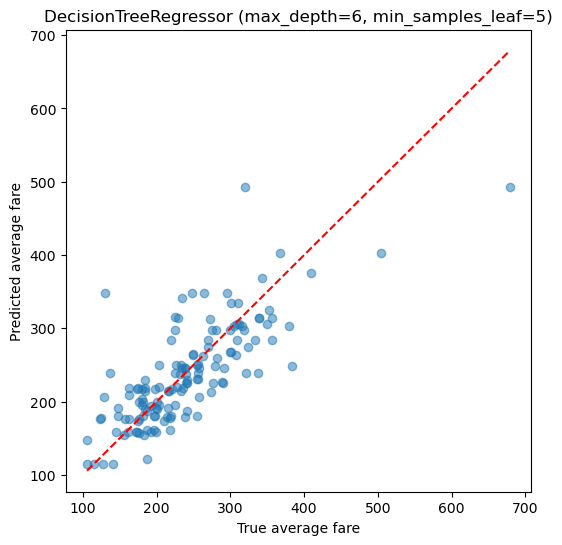

In [8]:
target = 'Average_Fare'
X = selected_df[[col for col in regresion_cols_nocorr if col != target]]
y = selected_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

reg = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True average fare")
plt.ylabel("Predicted average fare")
plt.title(f"DecisionTreeRegressor (max_depth=6, min_samples_leaf=5)")
plt.show()

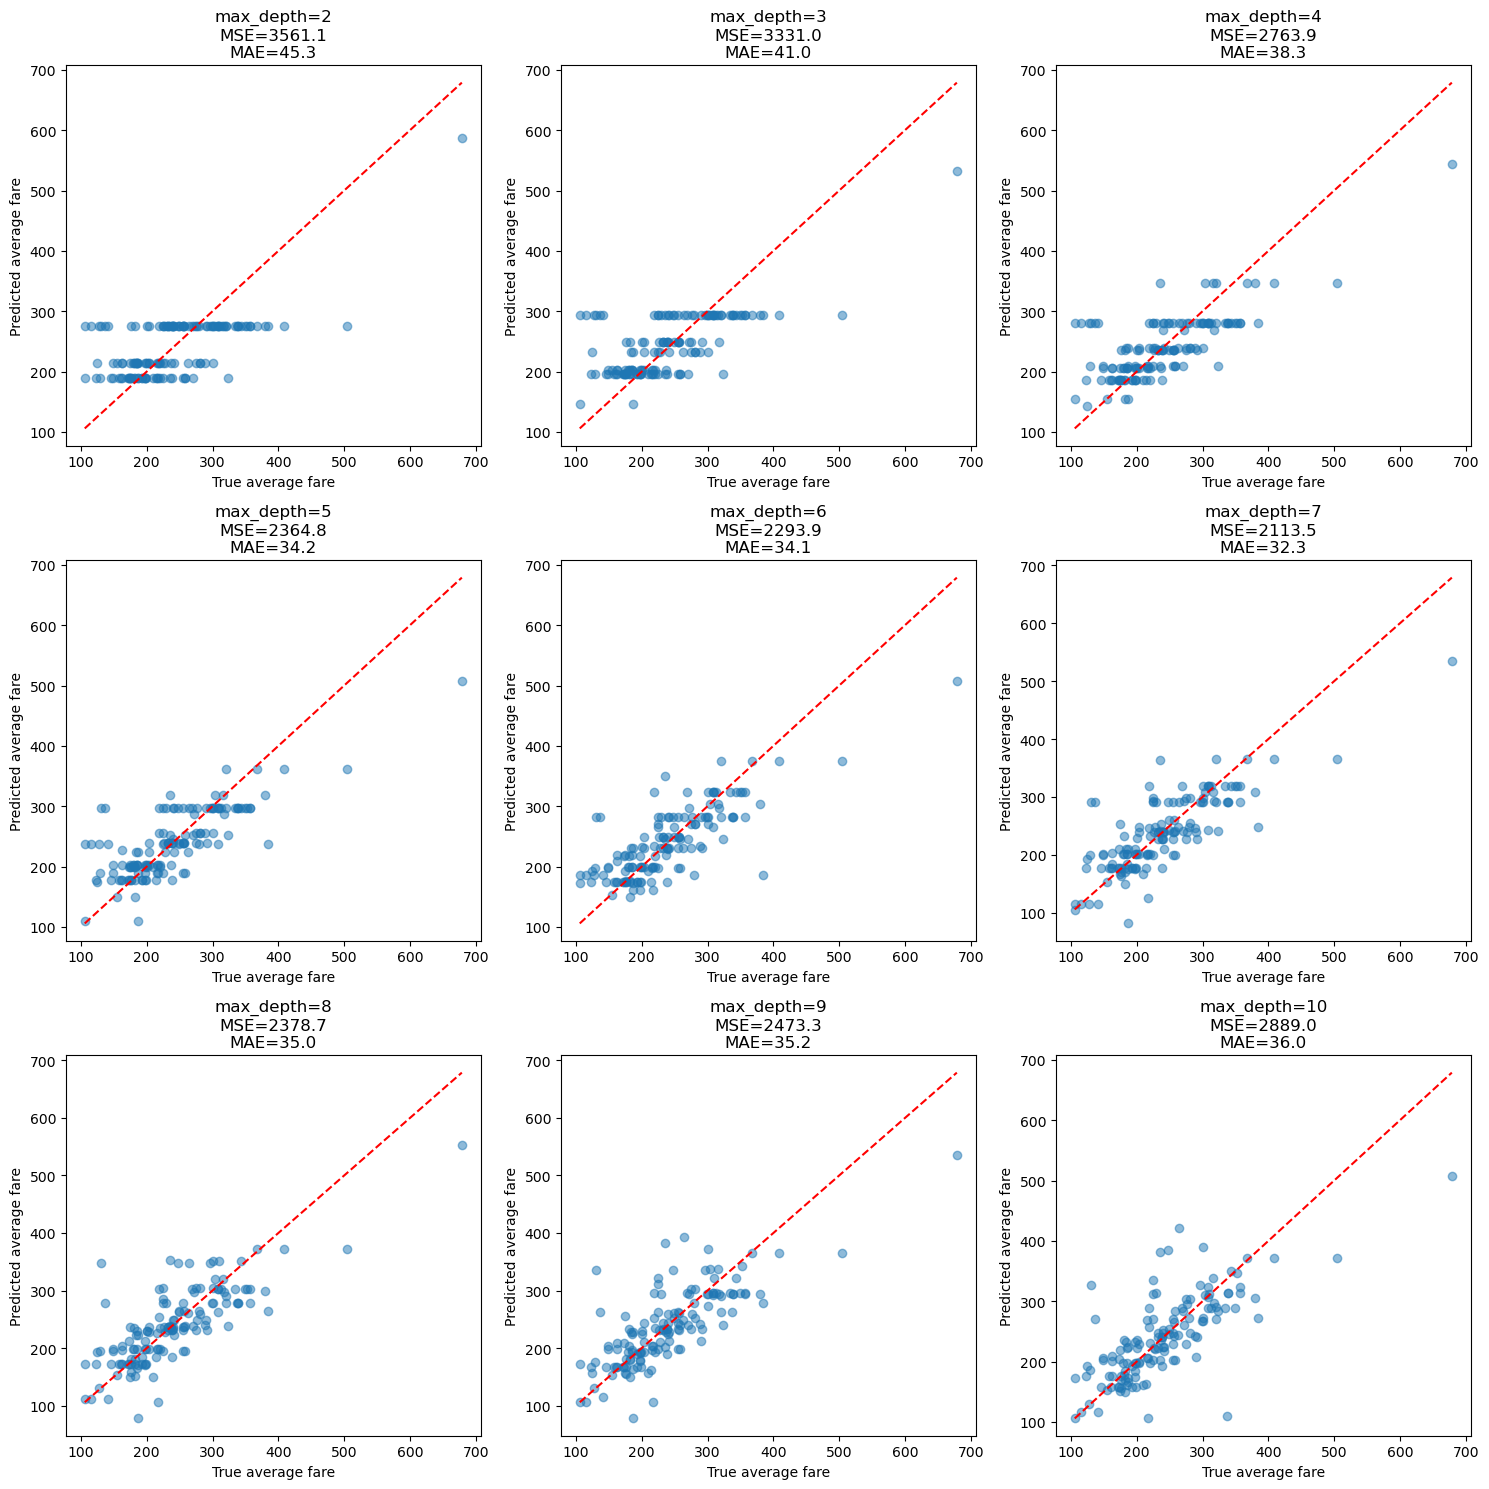

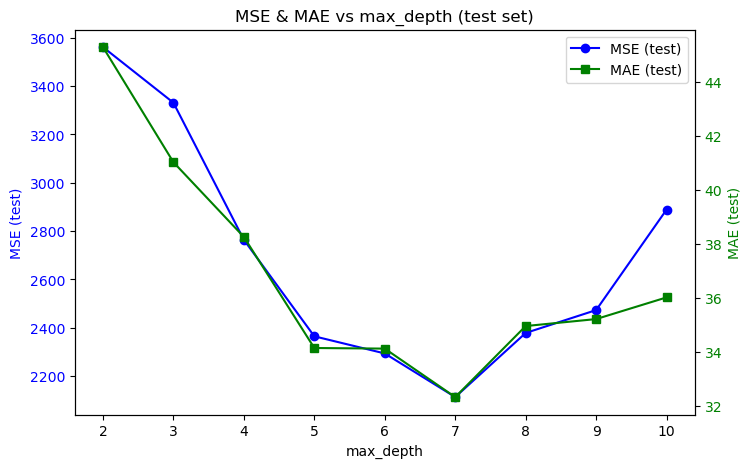

In [9]:
depths = [2,3,4,5,6,7,8,9,10]
mse_scores = []
mae_scores = []

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, depth in enumerate(depths):
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse_scores.append(mse)
    mae_scores.append(mae)
    
    ax = axes[i // 3, i % 3]
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_xlabel("True average fare")
    ax.set_ylabel("Predicted average fare")
    ax.set_title(f"max_depth={depth}\nMSE={mse:.1f}\nMAE={mae:.1f}")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(depths, mse_scores, marker='o', color='blue', label='MSE (test)')
ax2.plot(depths, mae_scores, marker='s', color='green', label='MAE (test)')

ax1.set_xlabel("max_depth")
ax1.set_ylabel("MSE (test)", color='blue')
ax2.set_ylabel("MAE (test)", color='green')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("MSE & MAE vs max_depth (test set)")
# Dodanie legendy dla obu osi
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.show()

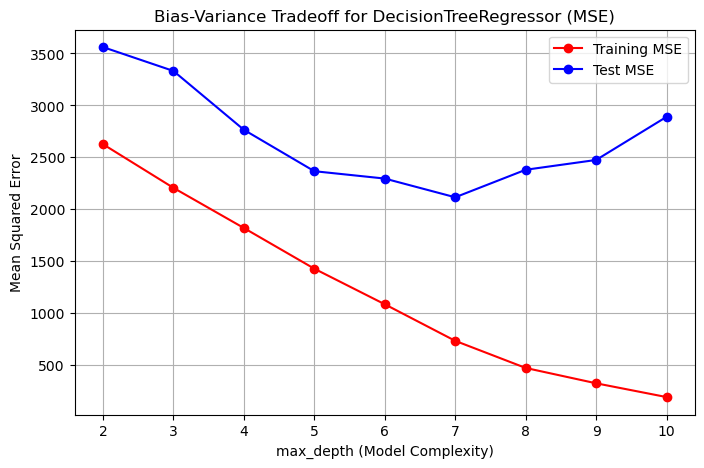

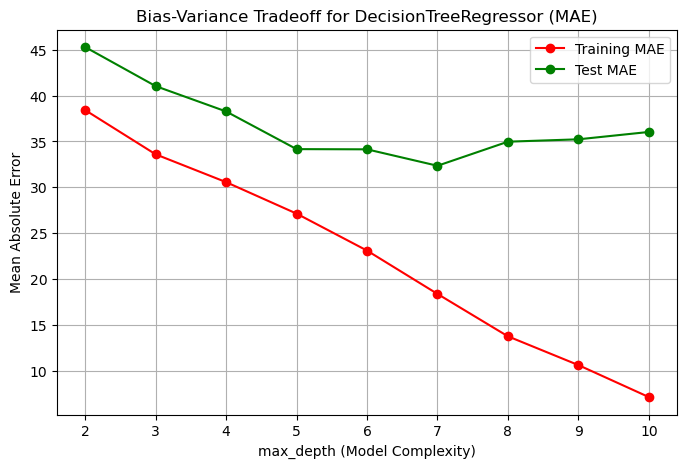

In [116]:
depths = [2,3,4,5,6,7,8,9,10]
train_mse = []
test_mse = []
train_mae = []
test_mae = []

for depth in depths:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(depths, train_mse, 'o-', color='red', label='Training MSE')
plt.plot(depths, test_mse, 'o-', color='blue', label='Test MSE')
plt.xlabel('max_depth (Model Complexity)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff for DecisionTreeRegressor (MSE)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(depths, train_mae, 'o-', color='red', label='Training MAE')
plt.plot(depths, test_mae, 'o-', color='green', label='Test MAE')
plt.xlabel('max_depth (Model Complexity)')
plt.ylabel('Mean Absolute Error')
plt.title('Bias-Variance Tradeoff for DecisionTreeRegressor (MAE)')
plt.grid(True)
plt.legend()
plt.show()

## Best values chosen as max_depth = 7

MSE: 2113.4514317113058
MAE: 32.33751651879069
R2: 0.6529191118633484


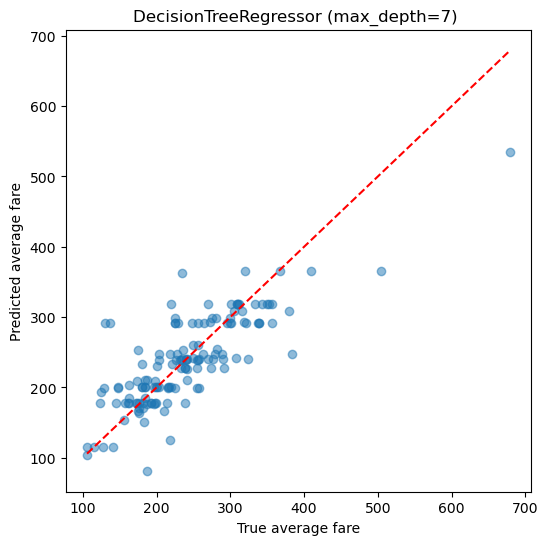

In [122]:
target = 'Average_Fare'
X = selected_df[[col for col in regresion_cols_nocorr if col != target]]
y = selected_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

reg = DecisionTreeRegressor(
    max_depth=7,
    random_state=42
)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True average fare")
plt.ylabel("Predicted average fare")
plt.title(f"DecisionTreeRegressor (max_depth=7) ")
plt.show()

# PCA

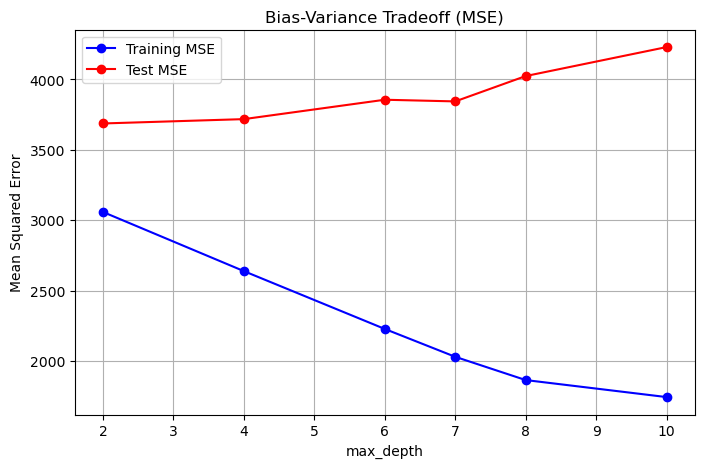

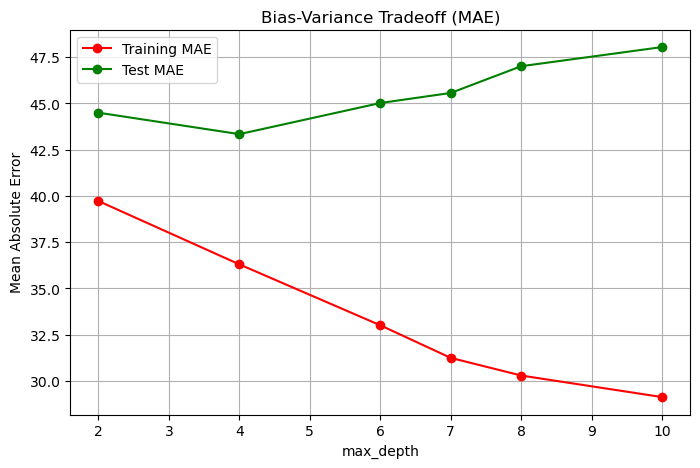

In [125]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

target = 'Average_Fare'
X = selected_df[[col for col in regresion_cols_nocorr if col != target]]
y = selected_df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

depths = [2, 4, 6,7, 8, 10]
train_mse = []
test_mse = []
train_mae = []
test_mae = []

for depth in depths:
    reg = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=5, random_state=42)
    reg.fit(X_train_pca, y_train)
    y_train_pred = reg.predict(X_train_pca)
    y_test_pred = reg.predict(X_test_pca)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

plt.figure(figsize=(8, 5))
plt.plot(depths, train_mse, 'o-', color='blue', label='Training MSE')
plt.plot(depths, test_mse, 'o-', color='red', label='Test MSE')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (MSE)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(depths, train_mae, 'o-', color='red', label='Training MAE')
plt.plot(depths, test_mae, 'o-', color='green', label='Test MAE')
plt.xlabel('max_depth')
plt.ylabel('Mean Absolute Error')
plt.title('Bias-Variance Tradeoff (MAE)')
plt.grid(True)
plt.legend()
plt.show()



## PCA, for any number of coeficcients, haven't help to obtain better results